# Clustering books based on annual sales
-Payam Saeedi

### Importing main libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dtale

### Reading the Excel file

In [39]:
df = pd.read_excel('C:\\Users\\p.saeedi\Desktop\\Lab\\PorteghalSales.xlsx', skiprows = 2)
df = df.rename(columns = {'عنوان محصول':'Tile','کد':'Code','تاریخ ورود به انبار':'Inventory Entry Date','تعداد سال فروش':'Current Lifespan', 'سال اول':'Year 1','سال دوم':'Year 2','سال سوم':'Year 3','سال چهارم':'Year 4','سال پنجم':'Year 5'})
df.head()

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5
0,خوب‌های بد، بدهای خوب 2:دنیای بدون شاهزاده,71057,13981108,1.0,10563,0,0,0,0
1,دوتا خفن، تابستان خود را چگونه گذراندند؟,70661,13970219,3.0,9242,3288,1287,0,0
2,تیمارستان متروک,70636,13970723,2.0,8892,4361,0,0,0
3,خوب های بد بدهای خوب,70113,13960616,3.0,8790,11971,9844,0,0
4,قصه های همیشگی: بازگشت ساحره,70115,13970905,2.0,8210,4477,0,0,0


### Removing young titles where number of sales years equals One or Zero

In [40]:
df = df[df['Current Lifespan'] !=1]
df = df[df['Current Lifespan'] !=0]

### Resetting Index

In [41]:
df = df.reset_index(drop = True)
df

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5
0,دوتا خفن، تابستان خود را چگونه گذراندند؟,70661,13970219,3.0,9242,3288,1287,0,0
1,تیمارستان متروک,70636,13970723,2.0,8892,4361,0,0,0
2,خوب های بد بدهای خوب,70113,13960616,3.0,8790,11971,9844,0,0
3,قصه های همیشگی: بازگشت ساحره,70115,13970905,2.0,8210,4477,0,0,0
4,دختری که ماه را نوشید,70278,13960311,4.0,7968,15064,10013,5583,0
...,...,...,...,...,...,...,...,...,...
669,لئوناردو، هیولایی که هیچ‌کس از او نمی‌ترسید,71087,13980202,2.0,28,507,0,0,0
670,غافلگیری‌های جورواجور آماندا و تمساحش,71122,13980223,2.0,20,452,0,0,0
671,شهر آفتابی,71111,13980210,2.0,16,638,0,0,0
672,این فیل وجود ندارد,71127,13980305,2.0,11,550,0,0,0


### Appending a column to calculate total sales per title

In [42]:
df.loc[:,'Total'] = df[['Year 1','Year 2', 'Year 3', 'Year 4', 'Year 5']].sum(axis=1)
df.head(5)

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total
0,دوتا خفن، تابستان خود را چگونه گذراندند؟,70661,13970219,3.0,9242,3288,1287,0,0,13817
1,تیمارستان متروک,70636,13970723,2.0,8892,4361,0,0,0,13253
2,خوب های بد بدهای خوب,70113,13960616,3.0,8790,11971,9844,0,0,30605
3,قصه های همیشگی: بازگشت ساحره,70115,13970905,2.0,8210,4477,0,0,0,12687
4,دختری که ماه را نوشید,70278,13960311,4.0,7968,15064,10013,5583,0,38628


### Sorting the dataframe based on total sales per title

In [43]:
df = df.sort_values(by = 'Total', ascending = False).reset_index(drop = True)

In [44]:
df

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total
0,پاستیل‌های بنفش,70012,13950220,5.0,6237,17690,26543,16205,8773,75448
1,دختری که ماه را نوشید,70278,13960311,4.0,7968,15064,10013,5583,0,38628
2,من جوکم 1,70039,13950218,5.0,5095,9030,10418,4455,1792,30790
3,دو تا خفن,70028,13950220,5.0,6517,8999,8515,4634,1994,30659
4,خوب های بد بدهای خوب,70113,13960616,3.0,8790,11971,9844,0,0,30605
...,...,...,...,...,...,...,...,...,...,...
669,جعبه کریسمس,60059,13951006,2.0,448,-3,0,0,0,445
670,عروسک ماهی زامبی,60072,13960219,3.0,95,44,1,0,0,140
671,نایلون خیلی سبز خوب,60044,13950603,2.0,90,5,0,0,0,95
672,لطفاً از من بترسید!,70980,13980203,2.0,68,9,0,0,0,77


### Removing the overachieving outlier!

In [45]:
df = df.drop(0)

In [46]:
df.reset_index(drop = True)

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total
0,دختری که ماه را نوشید,70278,13960311,4.0,7968,15064,10013,5583,0,38628
1,من جوکم 1,70039,13950218,5.0,5095,9030,10418,4455,1792,30790
2,دو تا خفن,70028,13950220,5.0,6517,8999,8515,4634,1994,30659
3,خوب های بد بدهای خوب,70113,13960616,3.0,8790,11971,9844,0,0,30605
4,سررسید فیروزه ای خیلی سبز 99,60060,13951107,4.0,1387,8711,12189,6034,0,28321
...,...,...,...,...,...,...,...,...,...,...
668,جعبه کریسمس,60059,13951006,2.0,448,-3,0,0,0,445
669,عروسک ماهی زامبی,60072,13960219,3.0,95,44,1,0,0,140
670,نایلون خیلی سبز خوب,60044,13950603,2.0,90,5,0,0,0,95
671,لطفاً از من بترسید!,70980,13980203,2.0,68,9,0,0,0,77


### Labeling titles based on performance

In [47]:
Maximum_Sales = df.Total.max()
Maximum_Sales

38628

In [48]:
df.loc[df.Total<1000, 'Performance'] = 'Weak'
df.loc[df.Total >= Maximum_Sales*0.8, 'Performance'] = 'Very Strong'
df.loc[df.Total.between(Maximum_Sales*0.2, Maximum_Sales*0.8), 'Performance'] = 'Strong'
df.loc[df.Total.between(1000,Maximum_Sales*0.2), 'Performance'] = 'Moderate'

### Overall data statistics

In [49]:
df.describe()

,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total
count,673.000000,6.730000e+02,672.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,70181.777117,1.396843e+07,2.855655,1793.190193,1241.977712,700.530461,242.479941,29.202080,4007.380386
std,3093.542085,9.567532e+03,0.904533,1430.485406,1639.273581,1450.732318,697.548759,176.550851,4709.572226
min,40094.000000,1.395022e+07,2.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000
25%,70243.000000,1.396061e+07,2.000000,848.000000,293.000000,0.000000,0.000000,0.000000,1241.000000
50%,70600.000000,1.397021e+07,3.000000,1294.000000,646.000000,142.000000,0.000000,0.000000,2173.000000
75%,70836.000000,1.398012e+07,3.000000,2275.000000,1397.000000,751.000000,0.000000,0.000000,4791.000000
max,71145.000000,1.398061e+07,5.000000,9242.000000,15064.000000,12189.000000,6034.000000,1994.000000,38628.000000


### Determining binary correlations

In [50]:
df.corr()

,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total
Code,1.000000,0.204904,-0.107727,0.014139,-0.068903,-0.129931,-0.054310,-0.011046,-0.068171
Inventory Entry Date,0.204904,1.000000,-0.877310,-0.306616,-0.500191,-0.583664,-0.533273,-0.315144,-0.537825
Current Lifespan,-0.107727,-0.877310,1.000000,0.279481,0.517065,0.613226,0.584344,0.393000,0.555127
Year 1,0.014139,-0.306616,0.279481,1.000000,0.740344,0.525302,0.370019,0.245313,0.787248
Year 2,-0.068903,-0.500191,0.517065,0.740344,1.000000,0.864918,0.740153,0.455634,0.966080
Year 3,-0.129931,-0.583664,0.613226,0.525302,0.864918,1.000000,0.878158,0.592195,0.920915
Year 4,-0.054310,-0.533273,0.584344,0.370019,0.740153,0.878158,1.000000,0.643633,0.812765
Year 5,-0.011046,-0.315144,0.393000,0.245313,0.455634,0.592195,0.643633,1.000000,0.548343
Total,-0.068171,-0.537825,0.555127,0.787248,0.966080,0.920915,0.812765,0.548343,1.000000


### Visualizing current correlations

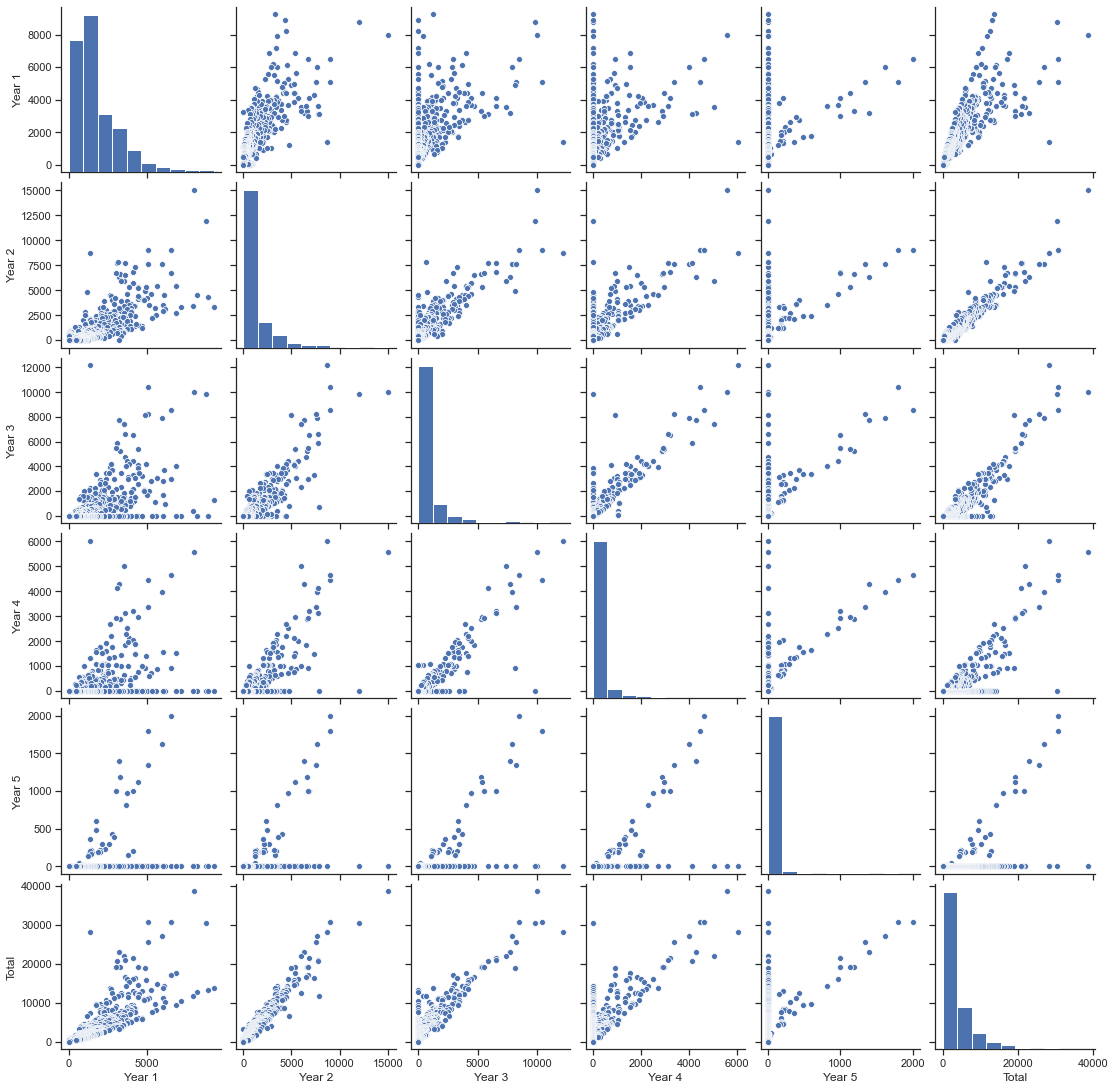

In [51]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[['Year 1','Year 2','Year 3','Year 4','Year 5','Total',]])
plt.savefig('Corr.png')

### Initial data prep. - Treat book codes as identifiers for clustering

In [52]:
X = df[['Year 1','Year 2','Year 3','Year 4','Year 5']]
y= df[['Code']]
df[['Code']] = df[['Code']].astype(str)
df.dtypes

Tile                     object
Code                     object
Inventory Entry Date      int64
Current Lifespan        float64
Year 1                    int64
Year 2                    int64
Year 3                    int64
Year 4                    int64
Year 5                    int64
Total                     int64
Performance              object
dtype: object

### Determining optiman number of clusters based on data structure - Using elbow method

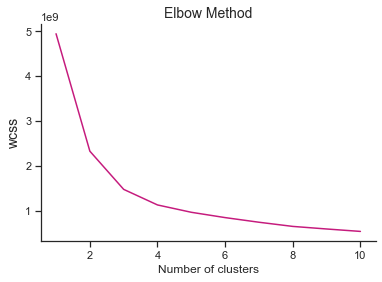

In [53]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.savefig('Elbow.png')
plt.show()

### Fitting data into 3 clusters using K-Means

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(X)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=10, n_init=10, random_state=0)
y_means = kmeans.fit_predict(X)

### Transforming data using Principal Component Analysis - PCA

In [56]:
pca_2d = pca.transform(X)

### Visualizing clusters

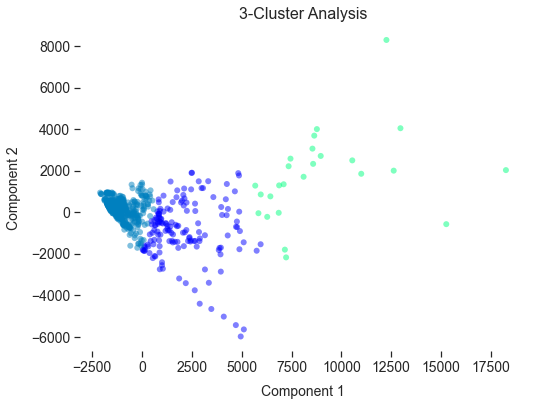

In [57]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_means, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("winter", 5),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=14)
plt.yticks(size=14)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('3-Cluster Analysis', size=16)


#plt.colorbar(ticks=[0,1,2])
plt.savefig('Cluster.jpg')
plt.show()

### Determining cluster centroids for book-by-book analysis

In [58]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['Year 1','Year 2','Year 3','Year 4','Year 5'])
centroids.index_name = "ClusterID"
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)
centroids

,Year 1,Year 2,Year 3,Year 4,Year 5,ClusterID
0,3470.743421,2577.230263,1344.684211,441.973684,33.348684,0
1,1135.004032,533.866935,212.193548,48.354839,2.372984,1
2,4652.080000,7172.560000,6472.680000,2881.000000,536.280000,2


## Porteghal books can be clustered into 3 separate categories based on mean volumes sold, making it easier to estimate a book's chance for sale in upcoming years based on current sales figures.

In [59]:
centroids_transpose= centroids.transpose()

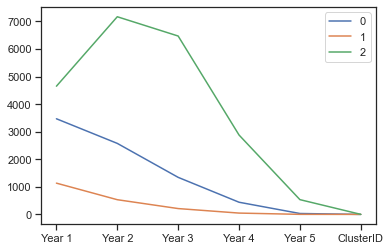

In [60]:
lines = centroids_transpose.plot.line()
plt.savefig('Sales Patterns.png')

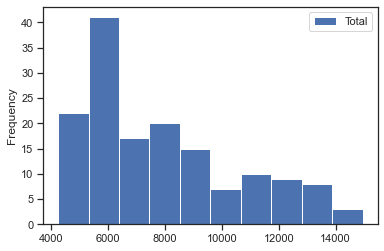

In [61]:
df0 = df[kmeans.labels_==0]
df0.plot(kind = 'hist', x = 'Code' , y='Total')
plt.savefig('Cluster0.png')

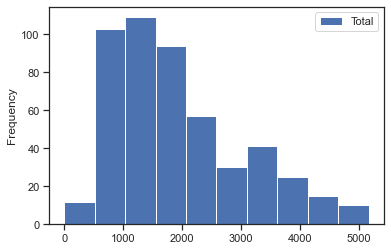

In [62]:
df1 = df[kmeans.labels_==1]
df1.plot(kind = 'hist', x = 'Code' , y='Total')
plt.savefig('Cluster1.png')

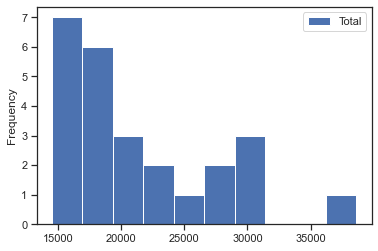

In [63]:
df2 = df[kmeans.labels_==2]
df2.plot(kind = 'hist', x = 'Code' , y='Total')
plt.savefig('Cluster2.png')

In [64]:
df0.groupby('Performance').count()

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total
Performance,,,,,,,,,,
Moderate,85,85,85,85,85,85,85,85,85,85
Strong,67,67,67,67,67,67,67,67,67,67


In [65]:
df0.head()

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total,Performance
25,باغبان شب,70201,13960311,4.0,5646,5420,3003,878,0,14947,Strong
27,قصه‌ها عوض می‌شوند : گیسو کمند,70175,13960623,3.0,6098,4519,3699,0,0,14316,Strong
28,بیگ نیت 4,70009,13950225,5.0,3631,3521,4032,2290,817,14291,Strong
29,هری پاتر,70052,13950715,4.0,5995,3488,2806,1553,0,13842,Strong
30,دوتا خفن، تابستان خود را چگونه گذراندند؟,70661,13970219,3.0,9242,3288,1287,0,0,13817,Strong


In [66]:
df1.groupby('Performance').count()

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total
Performance,,,,,,,,,,
Moderate,393,393,393,393,393,393,393,393,393,393
Weak,103,103,103,102,103,103,103,103,103,103


In [67]:
df1.head()

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total,Performance
159,دفتر خاطرات هیولاها 3 (حمله ی سایه های خرابکار),70021,13950215,5.0,1472,1382,1330,797,187,5168,Moderate
162,بال‌های آتشین 1: پیشگویی اژدهای کوچک,70118,13951215,4.0,1935,1632,1195,232,0,4994,Moderate
165,دفتر خاطرات هیولاها 5 (شوکولاسور ظاهر می شود),70027,13950215,5.0,1462,1274,1181,705,214,4836,Moderate
168,مواظبت از مامان بزرگ شیطون,70124,13960116,4.0,1655,1231,1406,513,0,4805,Moderate
170,کار علوم پیش دبستانی,40095,13960611,3.0,1692,1297,1789,0,0,4778,Moderate


In [68]:
df2.groupby('Performance').count()

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total
Performance,,,,,,,,,,
Strong,24,24,24,24,24,24,24,24,24,24
Very Strong,1,1,1,1,1,1,1,1,1,1


In [69]:
df2.head()

,Tile,Code,Inventory Entry Date,Current Lifespan,Year 1,Year 2,Year 3,Year 4,Year 5,Total,Performance
1,دختری که ماه را نوشید,70278,13960311,4.0,7968,15064,10013,5583,0,38628,Very Strong
2,من جوکم 1,70039,13950218,5.0,5095,9030,10418,4455,1792,30790,Strong
3,دو تا خفن,70028,13950220,5.0,6517,8999,8515,4634,1994,30659,Strong
4,خوب های بد بدهای خوب,70113,13960616,3.0,8790,11971,9844,0,0,30605,Strong
5,سررسید فیروزه ای خیلی سبز 99,60060,13951107,4.0,1387,8711,12189,6034,0,28321,Strong


In [73]:
df2.to_excel('All Star Porteghal.xlsx')

In [74]:
df1.to_excel('Weak to Moderate Porteghal.xlsx')

In [75]:
df0.to_excel('Moderate to Strong Porteghal.xlsx')